<Body>   
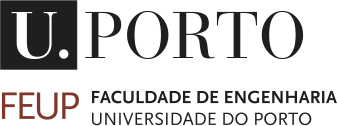
</Body>
<br>   
<br>   
<br>   

# **Mini projects on machine learning and control systems**

### 2025/2026      

<p>Department of Electrical and Computer Engineering</p>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt)

**José P. Carvalho** (jpcarvalho@fe.up.pt)

FEUP, Nov. 2025

---

# **Identification**

**Group:** xx

* **Name:** xxx **Student Number:** xx
* **Name:** xxx **Student Number:** xx
* **Name:** xxx **Student Number:** xx
* **Name:** xxx **Student Number:** xx
* **Name:** xxx **Student Number:** xx


---





# MPSAC Project


**Initial setup:** To download the file **data-set.cvs**, run the next cell (only once).

In [14]:
!wget -O dataset.csv.zip https://www.dropbox.com/s/i6h1wvis8wlay4u/data-set.zip?dl=0 --quiet
!unzip dataset.csv.zip -d.
import scipy

Archive:  dataset.csv.zip
replace ./data-set1.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

All the code you will need to develop, is on the next cell.

First, implement the nonlinear controller for the agent, and after the KNN classifier.

The only restriction on the controller is that the function my_controller must return the actuation value u, and be and it has to be scalar value.

As for the KNN, it must be contained in the function myKNN(K, trainX_data, trainY_data, new_pt), and return the predicted class (like sklearn's knn.predict). There is a bonification for implementing your own KNN.


In [55]:
###################################################################################################
##                                                                                               ##
##                                      Your code starts here                                    ##
##                                                                                               ##
## Grupo <x>                                                                                     ##
## <número e nome de cada um>                                                                    ##
## <número e nome de cada um>                                                                    ##
## <número e nome de cada um>                                                                    ##
## <número e nome de cada um>                                                                    ##
## <número e nome de cada um>                                                                    ##
###################################################################################################

### Control part
def my_controller(c,b, x, xd, xd_dot):
  # Complete here
  k=1  # parameter of the controller
  #u = ...
  u=0
  return u


def set_signals(xd_signal, xd_dot_signal):
  # Complete here
  for t in range(0,len(t_signal)):
    if t_signal[t] >= 0 and t_signal[t] < 50:
      xd_signal[t] = 0.9*np.sin(0.5*t_signal[t])
      xd_dot_signal[t] = 0.9*0.5*np.cos(0.5*t_signal[t])
    else:
      xd_signal[t] = -0.7
      xd_dot_signal[t] = 0.0

  return xd_signal, xd_dot_signal

### Machine Learning part
K = 0 #n_neighbors


## Implement KNN -
def myKNN(K, trainX_data, trainY_data, new_pt):
  return 1
###################################################################################################
##                                                                                               ##
##                              End of your code section, do not edit the next part              ##
##                                                                                               ##
###################################################################################################

### Part 1 - Control problem

Consider the dynamic model of agent $\Sigma$ given by  

\begin{cases}
\dot x(t) = -c|x(t)|x(t) - b + u(t) + d(t) & \text{if } x > -0.7 \\
\dot x(t) = \max(u(t), 0) & \text{if } x \leq -0.7
\end{cases}


where $c,b$ are constants, $x$ is the state (position of the agent) and $u$ is the input that is restricted to $u(t)\in [-1, 1]$. The signal $d(t)$ is an unknow noisy disturbance.

**Activity 1.1** Design a feedback law for $u(t)$ such that the state $x(t)$ will track a given desired reference signal $x_d(t)$




Consider now the next figure (run the code).

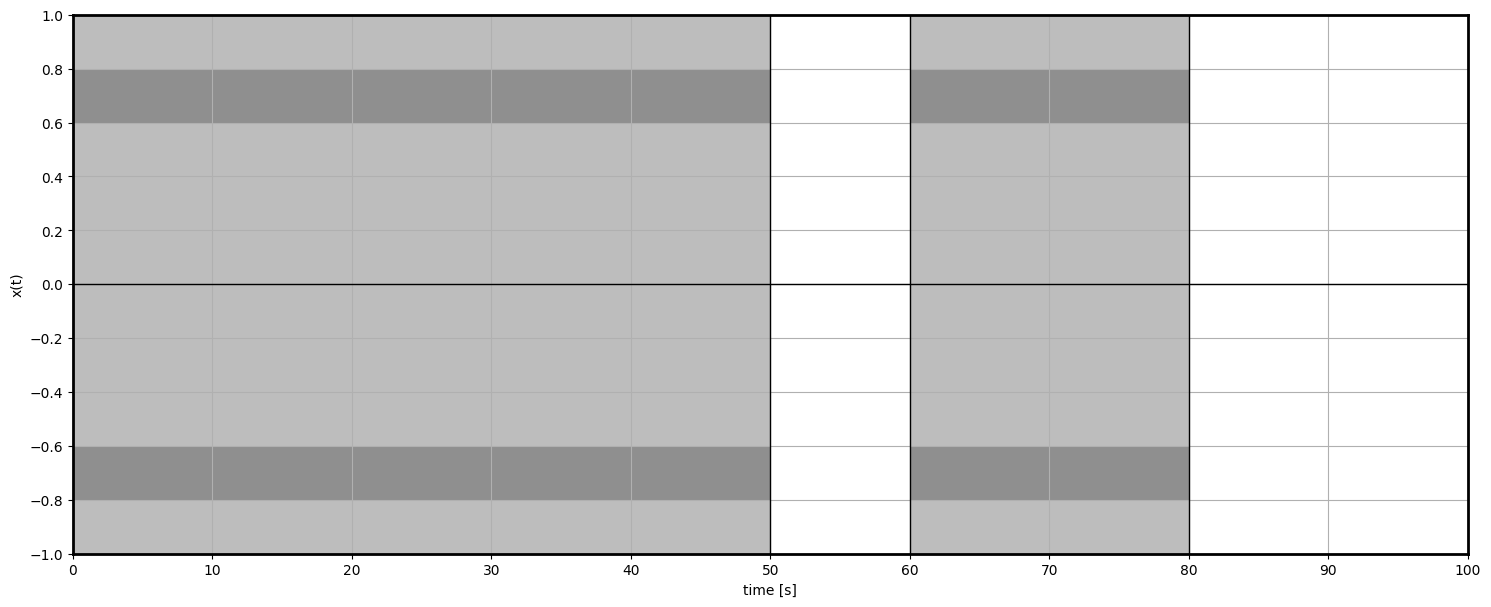

In [56]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

t_end = 100 #final time
# create a figure and axes
fig = plt.figure(figsize=(18,7))
ax = plt.subplot(1,1,1)
# set up the subplots as needed
ax.set_xlim(( 0, t_end))
ax.set_ylim((-1, 1))
ax.set_xlabel('time [s]')
ax.set_ylabel('x(t)')
ax.grid(which='both');
ax.xaxis.set_major_locator(MultipleLocator(t_end/10))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
plt.axvspan(0, 0.5*t_end, facecolor='#bdbdbd')
plt.axvspan(0.6*t_end, 0.8*t_end, facecolor='#bdbdbd')
plt.axhspan(0.6, 0.8, facecolor='#8f8f8f')
plt.axhspan(-0.6, -0.8, facecolor='#8f8f8f')
plt.axvspan(0.5*t_end, 0.6*t_end, facecolor='white')
plt.axvspan(0.8*t_end, t_end, facecolor='white')
plt.plot([0, t_end], [0, 0], 'black', lw=1)
plt.plot([0.8*t_end, 0.8*t_end], [-1, 1], 'black', lw=1)
plt.plot([0.6*t_end, 0.6*t_end], [-1, 1], 'black', lw=1)
plt.plot([0.5*t_end, 0.5*t_end], [-1, 1], 'black', lw=1)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)



**Activity 1.2** To test the developed control law, implement it together with an adequate selection of the desired signals $x_d(t)$ and $\dot x_d(t)$ so that the position of the agent $x(t)$
* will be (most of the time) inside the band ranging from (0.6)-(0.8), while $t\in[0, 50]$   
* and the band (-0.8)-(-0.6) while $t\in[50, 100]$.

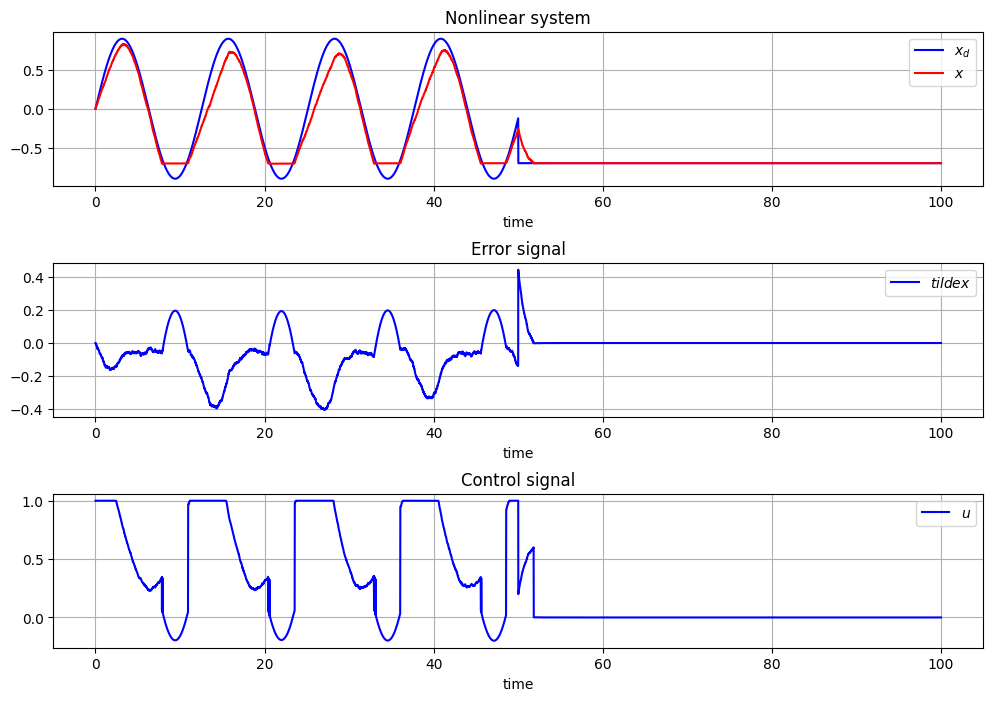

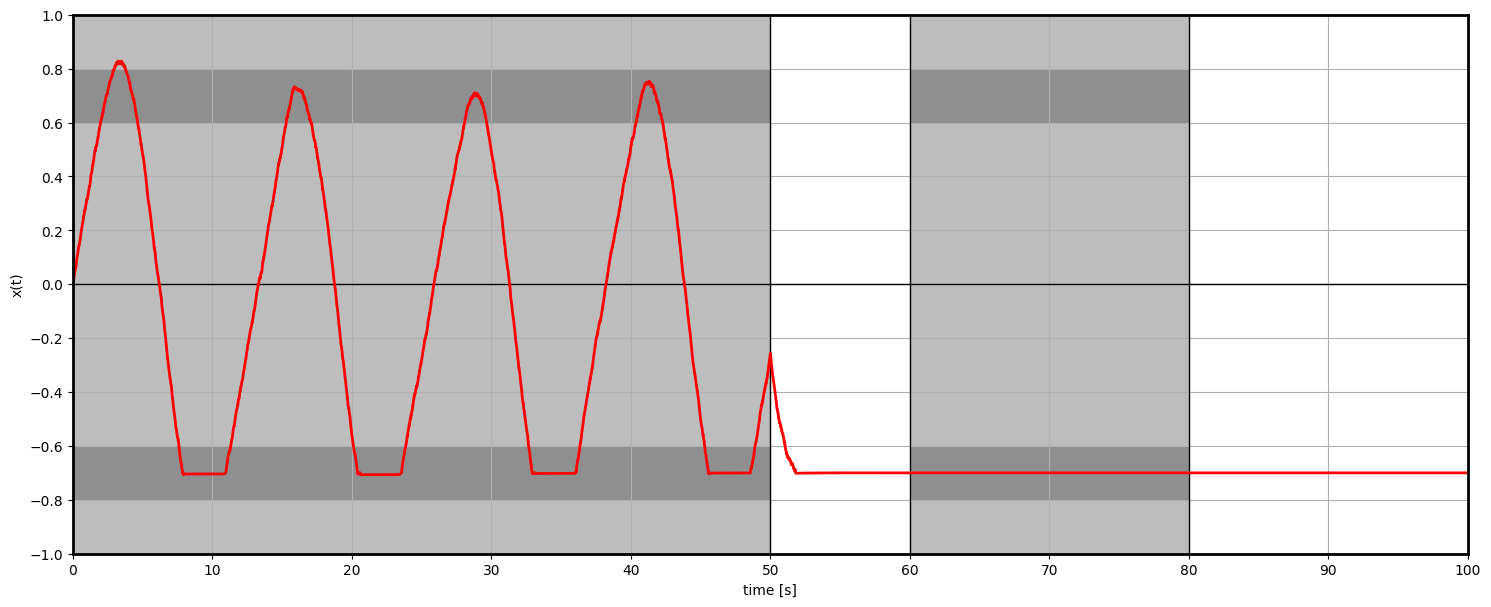

In [ ]:
# DO NOT MODIFY THIS CODE

import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

h = 0.01 #Sample time
c = 0.1
b = 0.65

# Discrete system
def disc_sys(x,u,h,c,b):
  if x>-0.7:
    return x + (-c*abs(x)*x -b + u + np.random.normal(-0.05, 0.2))*h
  else:
    return x + max(0,u)*h

#Signals
t_signal = np.arange(0,t_end,h) # time samples
x_signal = np.zeros_like(t_signal)
u_signal = np.zeros_like(t_signal)
xd_signal, xd_dot_signal = set_signals(np.zeros_like(t_signal), np.zeros_like(t_signal))

#Initial condition of our system
x_signal[0] = 0

np.random.seed(10)
# Iteration
for t in range(0,len(t_signal)-1):
    u_signal[t] = my_controller(c, b, x_signal[t], xd_signal[t], xd_dot_signal[t])
    # Saturate the control inputs between -1 and 1
    u_signal[t] = np.clip(u_signal[t], -1, 1)
    x_signal[t+1] = disc_sys(x_signal[t],u_signal[t],h,c,b)


#plot
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(wspace = 0.5, hspace = 0.5)
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.plot(t_signal, xd_signal, 'b-', label='$x_d$')
ax1.plot(t_signal, x_signal, 'r-', label='$x$')
ax1.set_title("Nonlinear system")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(t_signal, x_signal-xd_signal, 'b-', label='$tilde x$')
ax2.set_title("Error signal")
ax2.set_xlabel("time")
ax2.grid()
ax2.legend(loc='best')

ax3.plot(t_signal[0:len(t_signal)-1], u_signal[0:len(t_signal)-1], 'b-', label='$u$')
ax3.set_title("Control signal")
ax3.set_xlabel("time")
ax3.grid()
ax3.legend(loc='best')

plt.show()


# create a figure and axes
fig = plt.figure(figsize=(18,7))
ax = plt.subplot(1,1,1)
# set up the subplots as needed
ax.set_xlim(( 0, t_end))
ax.set_ylim((-1, 1))
ax.set_xlabel('time [s]')
ax.set_ylabel('x(t)')
ax.grid(which='both')
ax.xaxis.set_major_locator(MultipleLocator(t_end/10))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
plt.axvspan(0, 0.5*t_end, facecolor='#bdbdbd')
plt.axvspan(0.6*t_end, 0.8*t_end, facecolor='#bdbdbd')
plt.axhspan(0.6, 0.8, facecolor='#8f8f8f')
plt.axhspan(-0.6, -0.8, facecolor='#8f8f8f')
plt.axvspan(0.5*t_end, 0.6*t_end, facecolor='white')
plt.axvspan(0.8*t_end, t_end, facecolor='white')
plt.plot([0, t_end], [0, 0], 'black', lw=1)
plt.plot([0.8*t_end, 0.8*t_end], [-1, 1], 'black', lw=1)
plt.plot([0.6*t_end, 0.6*t_end], [-1, 1], 'black', lw=1)
plt.plot([0.5*t_end, 0.5*t_end], [-1, 1], 'black', lw=1)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)


# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax1.set_title('')
pt1, = ax.plot([], [], 'b.', ms=20)
line3, = ax.plot([], [], 'r', lw=2)
line4, = ax.plot(t_signal, x_signal, 'r-', lw=2)

### Part 2 - Machine learning problem

Consider the following $\color{blue}{\text{trainning data set}}$ composed by 100 samples of class 1 and another 100 samples of class 2.


In [58]:
import pandas as pd
dataTrain = pd.read_csv('data-set1.csv', index_col=0)
dataTrain


,feature 1,feature 2,label
0,-5.535047,-3.539697,1.0
1,-4.073557,-6.505985,1.0
2,-5.641425,-4.560727,1.0
3,-5.119353,-4.716652,1.0
4,-5.067489,-5.035938,1.0
...,...,...,...
195,1.772352,0.395708,2.0
196,1.131479,0.180728,2.0
197,0.524661,0.250459,2.0
198,4.754778,2.692851,2.0


Let's visualize it!

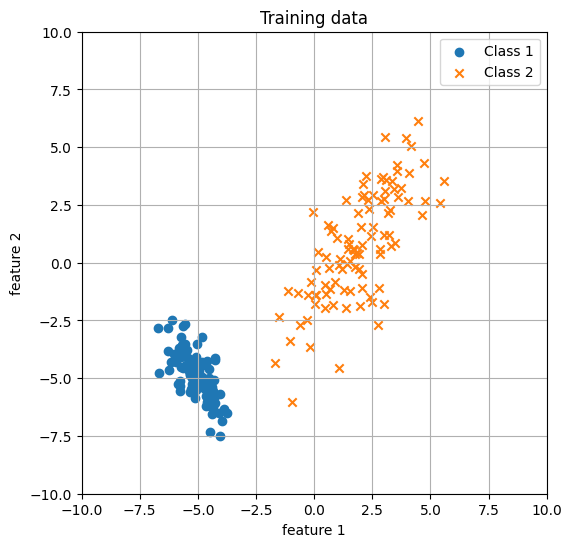

In [59]:
X_1 = dataTrain.iloc[0:100, np.arange(0,2,1)].values
X_2 = dataTrain.iloc[100:200, np.arange(0,2,1)].values
X = dataTrain.iloc[:, np.arange(0,2,1)].values
Y = dataTrain["label"].values

plt.figure(figsize=(6,6))
plt.scatter(X_1[:,0], X_1[:,1], marker='o', label='Class 1')
plt.scatter(X_2[:,0], X_2[:,1], marker='x', label='Class 2')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.title('Training data')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(loc='best')
plt.grid()
plt.show()


Consider also the $\color{blue}{\text{test data set}}$
composed by a total of $\color{blue}{3000}$ samples, where it is known that around $\color{blue}{1/3}$ of them belong to class 1 and the rest to class 2.

In [60]:
dataTest = pd.read_csv('data-set2.csv', index_col=0)
dataYTest = pd.read_csv('data-set3.csv', index_col=0)
dataTest


,feature 1,feature 2
0,-4.275528,-6.344763
1,0.189112,-1.783335
2,1.351171,0.362168
3,-1.763409,-2.672367
4,2.973722,1.237152
...,...,...
2995,-4.492199,-4.700613
2996,-4.293387,-5.685385
2997,1.036334,-0.988838
2998,3.475178,1.192830


Let's visualize it!

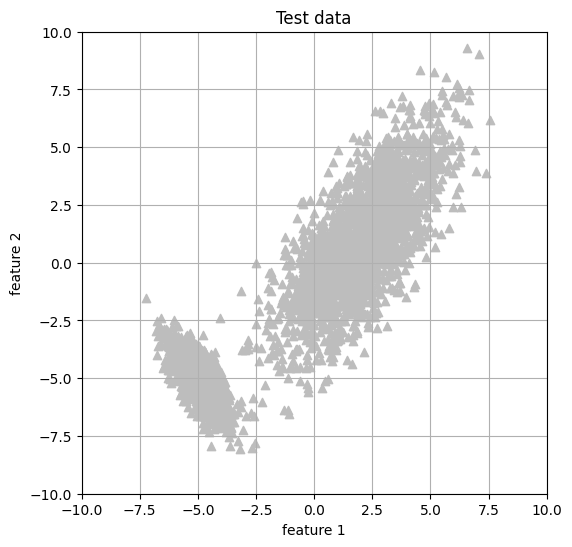

In [61]:
testX = dataTest.iloc[:, np.arange(0,2,1)].values

plt.figure(figsize=(6,6))
plt.scatter(testX[:,0], testX[:,1], marker='^', facecolor='#bdbdbd')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.title('Test data')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.grid()

**Activity 2.1** Implement a K-Nearest Neighbors classifier and test it for each sample of the test data using all the trainning data.

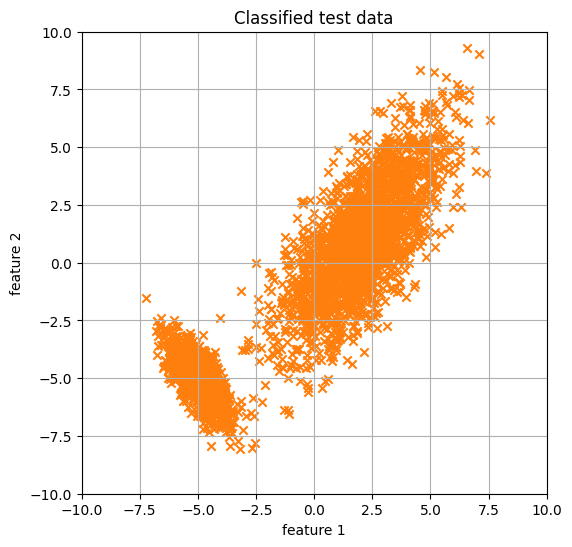

In [62]:


#test_pt = np.array([-2.5,-0.5])
#print("Class: ", int(myKNN(K,X,y,test_pt).mode))

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

classification = []
for i in range(len(testX)):
  classification.append(int(myKNN(K,X,Y,testX[i])))

classification = np.array(classification)

plt.figure(figsize=(6,6))
plt.scatter(testX[np.where(classification==1),0], testX[np.where(classification==1),1], marker='o')
plt.scatter(testX[np.where(classification==2),0], testX[np.where(classification==2),1], marker='x')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.title('Classified test data')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.grid()




### Part 3 - Combined control and machine learning problem

Consider again the first figure of this notebook. The figure is split into 4 regions in time. The dark ones correspond to training and the white ones to test (evaluation). \\
In the training region:
* while the agent position $x(t)$ is in the dark band region the agent receives one training sample per second. If it is in the upper band, the sample belongs to class 1. If it is in the lower band, the sample belongs to class 2.

In the evaluation region:
* the agent receives 100 test samples per second and it has to classify them.

**Goal**: By controlling the movement of the agent $\Sigma$ and the parameter of the classifier, try to minimize the error of classification and the energy (while in the trainning region) of the input signal $u_t$!

How is this measured?
\begin{align*}
J &= 0.3\big(\text{Number of misclassified samples in the first test region}\big) \\
&\quad +   0.7\big(\text{ Number of misclassified samples in the second test region}\big) \\
&\quad+ 0.5  \big(\sum_{t=0}^{50} u_t^2 + \sum_{t=60}^{80} u_t^2 \big)w
\end{align*}
where $w=1/100$ is a weight coefficient.




In [ ]:
# DO NOT MODIFY THIS CODE
np.random.seed(123)
energy_R1 = 0
count_class1_R1, count_class2_R1  = 0, 0
for t in np.arange(0, 5000):
  if t_signal[t] < 50 or (t_signal[t] >= 60 and t_signal[t] < 80):
    if x_signal[t] <= 0.8 and x_signal[t] >= 0.6:
      count_class2_R1 += 1
    if x_signal[t] <= -0.6 and x_signal[t] >= -0.8:
      count_class1_R1 += 1
    energy_R1 = energy_R1 + u_signal[t]**2
count_class1_R1 = int(count_class1_R1*h)
count_class2_R1 = int(count_class2_R1*h)
print("Region 1")
print("Number of collected tranning samples in class 1: ", count_class1_R1)
print("Number of collected tranning samples in class 2: ", count_class2_R1)

energy_R2 = 0
count_class1_R2, count_class2_R2  = 0, 0
for t in np.arange(6000, 8000):
  if t_signal[t] < 50 or (t_signal[t] >= 60 and t_signal[t] < 80):
    if x_signal[t] <= 0.8 and x_signal[t] >= 0.6:
      count_class2_R2 += 1
    if x_signal[t] <= -0.6 and x_signal[t] >= -0.8:
      count_class1_R2 += 1
    energy_R2 = energy_R2 + u_signal[t]**2
count_class1_R2 = int(count_class1_R2*h)
count_class2_R2 = int(count_class2_R2*h)
print("Region 2")
print("Number of collected tranning samples in class 1: ", count_class1_R2)
print("Number of collected tranning samples in class 2: ", count_class2_R2)

iter = 1
error_clas_R2 = np.zeros(iter)
error_clas_R1 = np.zeros(iter)
for j in range(iter):
  testY = dataYTest["label"].values
  random_indices_X_1 = np.random.randint(0, X_1.shape[0], count_class1_R1)
  random_indices_X_2 = np.random.randint(0, X_2.shape[0], count_class2_R1)
  X_train = np.vstack((X_1[random_indices_X_1], X_2[random_indices_X_2]))
  Y_train = np.concatenate((np.ones(count_class1_R1),
                      2*np.ones(count_class2_R1)))

  for i in np.arange(0, 1000):
    result = myKNN(K, X_train, Y_train, testX[i])
    if result != testY[i]:
      error_clas_R1[j] += 1

  testY = dataYTest["label"].values
  random_indices_X_1 = np.random.randint(0, X_1.shape[0], count_class1_R2+count_class1_R1)
  random_indices_X_2 = np.random.randint(0, X_2.shape[0], count_class2_R2+count_class2_R1)
  X_train = np.vstack((X_1[random_indices_X_1], X_2[random_indices_X_2]))
  Y_train = np.concatenate((np.ones(count_class1_R1+count_class1_R2),
                      2*np.ones(count_class2_R1+count_class2_R2)))

  for i in np.arange(1000, testX.shape[0]):
    result = myKNN(K, X_train, Y_train, testX[i])
    if result != testY[i]:
      error_clas_R2[j] += 1
print(" ")
print("Number of misclassified samples in the first region: ", error_clas_R1)
print("Average Number of misclassified samples in the first region: ", np.mean(error_clas_R1))
print("Input energy in the first region: ", energy_R1/100)
print("Number of misclassified samples in the second region: ", error_clas_R2)
print("Average Number of misclassified samples in the second region: ", np.mean(error_clas_R2))
print("Input energy in the second region: ", energy_R2/100)
print("Total  average error of classification: ", np.mean(error_clas_R1+error_clas_R2))
print("Total input energy: ", (energy_R1+energy_R2)/100)
print("Average Performance index J = ", 0.3*(np.mean(error_clas_R1))+0.7*(np.mean(error_clas_R2)) + 0.5*(energy_R1+energy_R2)/100)
print("Performance index J = ", 0.3*((error_clas_R1))+0.7*((error_clas_R2)) + 0.5*(energy_R1+energy_R2)/100)

Region 1
Number of collected tranning samples in class 1:  14
Number of collected tranning samples in class 2:  7
Number of misclassified samples in the first region:  355
Input energy in the first region:  22.732921379648847
Region 2
Number of collected tranning samples in class 1:  20
Number of collected tranning samples in class 2:  0
Number of misclassified samples in the second region:  645
Input energy in the second region:  6.700462435303908e-14
Total error of classification:  1000
Total input energy:  22.732921379648914
Performance index J =  569.3664606898244


In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)


# create a figure and axes
fig = plt.figure(figsize=(18,7))
ax = plt.subplot(1,1,1)
# set up the subplots as needed
ax.set_xlim(( 0, t_end))
ax.set_ylim((-1, 1))
ax.set_xlabel('time [s]')
ax.set_ylabel('x(t)')
ax.grid(which='both');
ax.xaxis.set_major_locator(MultipleLocator(t_end/10))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
plt.axvspan(0, 0.5*t_end, facecolor='#bdbdbd')
plt.axvspan(0.6*t_end, 0.8*t_end, facecolor='#bdbdbd')
plt.axhspan(0.6, 0.8, facecolor='#8f8f8f')
plt.axhspan(-0.6, -0.8, facecolor='#8f8f8f')
plt.axvspan(0.5*t_end, 0.6*t_end, facecolor='white')
plt.axvspan(0.8*t_end, t_end, facecolor='white')
plt.plot([0, t_end], [0, 0], 'black', lw=1)
plt.plot([0.8*t_end, 0.8*t_end], [-1, 1], 'black', lw=1)
plt.plot([0.6*t_end, 0.6*t_end], [-1, 1], 'black', lw=1)
plt.plot([0.5*t_end, 0.5*t_end], [-1, 1], 'black', lw=1)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)


# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax.set_title('')
pt1, = ax.plot([], [], 'b.', ms=20)
line3, = ax.plot([], [], 'r', lw=2)
#line4, = ax.plot(t_signal, x_signal, 'r-', lw=2)

def drawframe(n):
    size_x = len(x_signal)
    frames = 100
    t_win = int(size_x/frames*(n+1)-1)
    line3.set_data(t_signal[0:t_win],x_signal[0:t_win])
    pt1.set_data([t_signal[t_win]],[x_signal[t_win]])
    txt_title.set_text('Frame = {0:4d}'.format(n))
    return (pt1, line3)


from matplotlib import animation
# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=100, interval=50, blit=True)

plt.close(anim._fig)

from IPython.display import HTML
HTML(anim.to_html5_video())


<ipython-input-64-eab779216495>:49: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  pt1.set_data(t_signal[t_win],x_signal[t_win])
<ipython-input-64-eab779216495>:49: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  pt1.set_data(t_signal[t_win],x_signal[t_win])


**Question 1** Show how you got to the controller in Activity 1. Can either be done in here or in paper.

-


**Question 1.1** Explain the reasoning behind the choice of k parameter in the controller.


-

**Question 1.2** Explain the strategy (in terms of energy spenditure) you chose with the choice of the reference **xd**.

-

**Question 2**  Justify the value of K in the KNN implementation. You can show how different values of K perform.

-


**Question 2.1** Which class is harder to classify? Justify you results.





---


Tip: You can use a confusion Matrix.

**Question 2.2** What was your strategy in the collection of samples to construct the dataset? Why?


Tip: You can plot the Dataset


-

**Feedback** Leave your feedback on this project here! :)